<a href="https://colab.research.google.com/github/kunyoungkim/streamlit-test/blob/main/matplotlib%2C_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
base_path = "/content/drive/MyDrive/git/data/"
sales = pd.read_csv(base_path + "raw_sales.csv", parse_dates=['datesold']) # pase_dates : 날짜 컬럼 자동 변환 옵션
sales.head(1)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
# 연도만 추출
sales['year'] = sales['datesold'].dt.year
sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [ ]:
import numpy as np

result = np.round(sales.groupby('year')['price'].agg('mean'), 1)
result

,price
year,
2007,522377.2
2008,493814.2
2009,496092.0
2010,559564.8
2011,566715.1
2012,552501.4
2013,553416.3
2014,592653.8
2015,626101.3


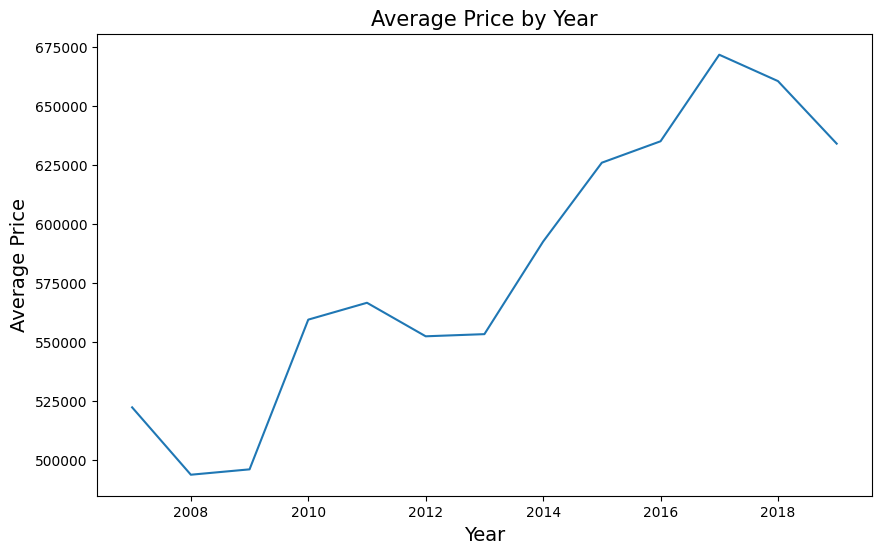

In [ ]:
# 시간의 변동에 다라서 추세를 보고 싶음
# 선 그래프
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(result.index, result.values)
ax.set_title('Average Price by Year', size=15)
ax.set_xlabel('Year', size = 14)
ax.set_ylabel('Average Price', size = 14)
plt.savefig('average_price_by_year.png')
plt.show()

### 막대 그래프

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

base_path = "/content/drive/MyDrive/git/data/"
sales = pd.read_csv(base_path + "raw_sales.csv", parse_dates=['datesold']) # pase_dates : 날짜 컬럼 자동 변환 옵션
sales.head(1)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4


In [ ]:
# 월별 막대 그래프를 x축으로 기준
# 2007년, 2008년 병합

sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month

sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2


In [ ]:
df = sales.copy()
df.head(1)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2


In [ ]:
df = df.loc[df['year'].isin([2007,2008, 2009]), :]
df.tail()

,datesold,postcode,price,propertyType,bedrooms,year,month
24802,2009-12-22,2606,335000,unit,2,2009,12
24803,2009-12-22,2606,350000,unit,2,2009,12
24804,2009-12-23,2603,330000,unit,1,2009,12
24805,2009-12-24,2606,366000,unit,2,2009,12
24806,2009-12-24,2617,367000,unit,2,2009,12


In [ ]:
result = np.round(df.groupby(['year', 'month'])['price'].agg('mean'), 1)
result.reset_index().iloc[::3,:] # 모든 행을 가져오는데, 3칸씩 띄어서 가져오는 문법

,year,month,price
0,2007,2,407500.0
3,2007,5,339500.0
6,2007,8,505608.7
9,2007,11,505442.3
12,2008,2,531080.0
15,2008,5,522394.7
18,2008,8,449510.4
21,2008,11,489546.3
24,2009,2,459281.6
27,2009,5,477808.7


In [ ]:
result = result.reset_index()
result['year'].unique()

array([2007, 2008, 2009], dtype=int32)

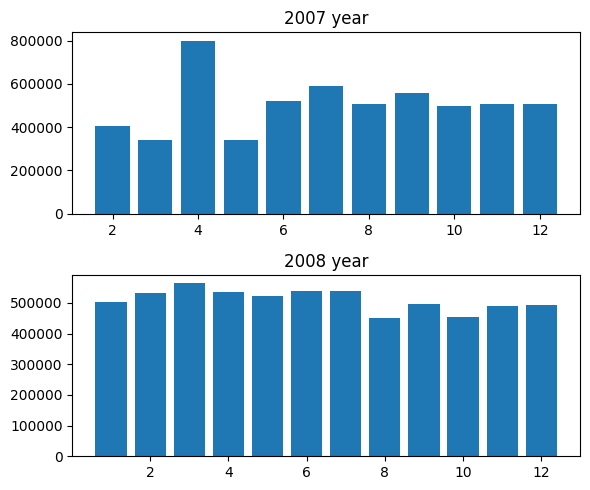

In [ ]:
result_2007 = result.loc[result['year'] == 2007, :]
result_2008 = result.loc[result['year'] == 2008, :]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 5))
ax[0].bar(result_2007['month'], result_2007['price'])
ax[0].set_title('2007 year')
ax[1].bar(result_2008['month'], result_2008['price'])
ax[1].set_title('2008 year')

plt.tight_layout()
plt.show()

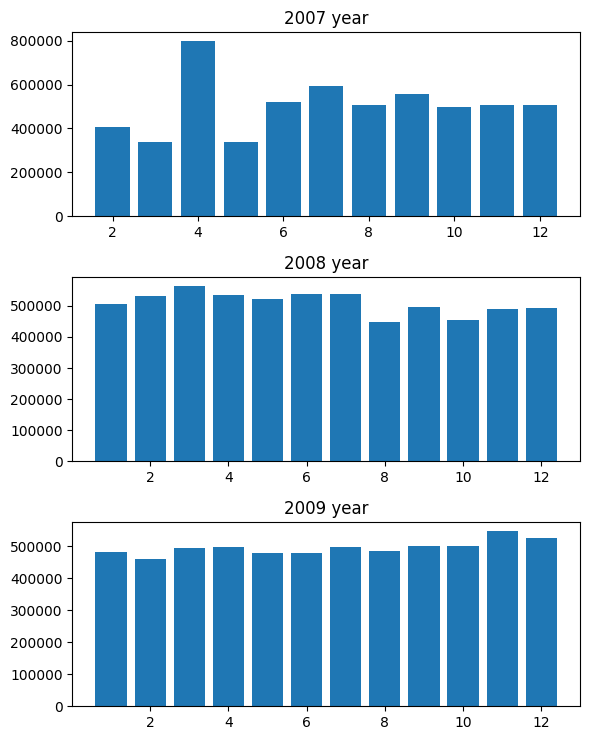

In [ ]:
fig, ax = plt.subplots(nrows=result['year'].nunique(), ncols=1, figsize=(6, result['year'].nunique() * 2.5))
for i, y in enumerate(result['year'].unique()):
  data = result.loc[result['year'] == y, :]
  ax[i].bar(data['month'], data['price'])
  ax[i].set_title(f'{y} year')

plt.tight_layout()
plt.show()

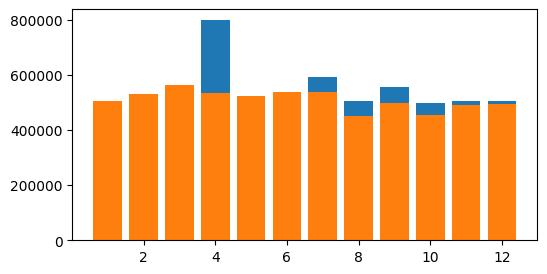

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(result_2007['month'], result_2007['price'])
ax.bar(result_2008['month'], result_2008['price'])

plt.show()

## seaborn

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

base_path = "/content/drive/MyDrive/git/data/"
sales = pd.read_csv(base_path + "raw_sales.csv", parse_dates=['datesold']) # pase_dates : 날짜 컬럼 자동 변환 옵션

sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month

df = sales.loc[sales['year'].isin([2008, 2018]), :].reset_index(drop=True)
df.head()

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2008-01-02,2906,309000,house,2,2008,1
1,2008-01-14,2602,413000,house,3,2008,1
2,2008-01-15,2905,445000,house,4,2008,1
3,2008-01-15,2902,600000,house,4,2008,1
4,2008-01-17,2605,417500,house,2,2008,1


In [ ]:
df['year'].unique()

array([2008, 2018], dtype=int32)

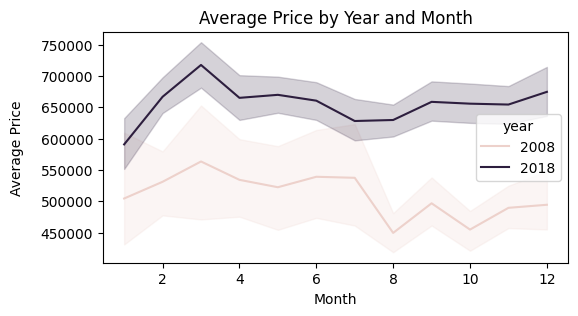

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.lineplot(data=df, x='month', y='price', hue='year', ax=ax)
ax.set_title('Average Price by Year and Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price', labelpad=12)

plt.show()

#### boxplot

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = {'values' : [10,12,12,13,12,11,14,13,15,102,12,14,14,17,18,19,20]}
temp_df = pd.DataFrame(data)
temp_df

,values
0,10
1,12
2,12
3,13
4,12
5,11
6,14
7,13
8,15
9,102


In [28]:
def remove_outlier_iqr(df, column):

  # 1단계 : Q1, Q3 and IOR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  # 2단계 : lower_bound, upper_bound
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # 3단계 : 이상치 확인
  outliers = df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), :].reset_index(drop=True)

  # 4단계 : 이상치 제거
  df_clean = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound), :]

  return df_clean, outliers

In [16]:
remove_outlier_iqr(temp_df, 'values')

(    values
 0       10
 1       12
 2       12
 3       13
 4       12
 5       11
 6       14
 7       13
 8       15
 10      12
 11      14
 12      14
 13      17
 14      18
 15      19
 16      20,
    values
 0     102)

In [31]:
df = sales.loc[sales['year'].isin([2007, 2008, 2009, 2010]), :]
df_clean, outliers = remove_outlier_iqr(df, 'price')
df_clean

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
24983,2010-12-15,2612,415000,unit,1,2010,12
24984,2010-12-20,2905,350000,unit,2,2010,12
24985,2010-12-21,2612,640000,unit,2,2010,12
24986,2010-12-24,2606,300000,unit,1,2010,12


In [30]:
outliers

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-04-30,2606,1530000,house,4,2007,4
1,2007-07-07,2602,900000,house,4,2007,7
2,2007-07-21,2603,1780000,house,4,2007,7
3,2007-09-21,2603,1460000,house,5,2007,9
4,2007-09-24,2612,920000,house,4,2007,9
...,...,...,...,...,...,...,...
181,2009-10-22,2604,890000,unit,2,2009,10
182,2010-01-22,2604,2425000,unit,3,2010,1
183,2010-03-19,2604,1200000,unit,2,2010,3
184,2010-10-29,2600,1275000,unit,3,2010,10


Text(0.5, 1.0, 'without outliers')

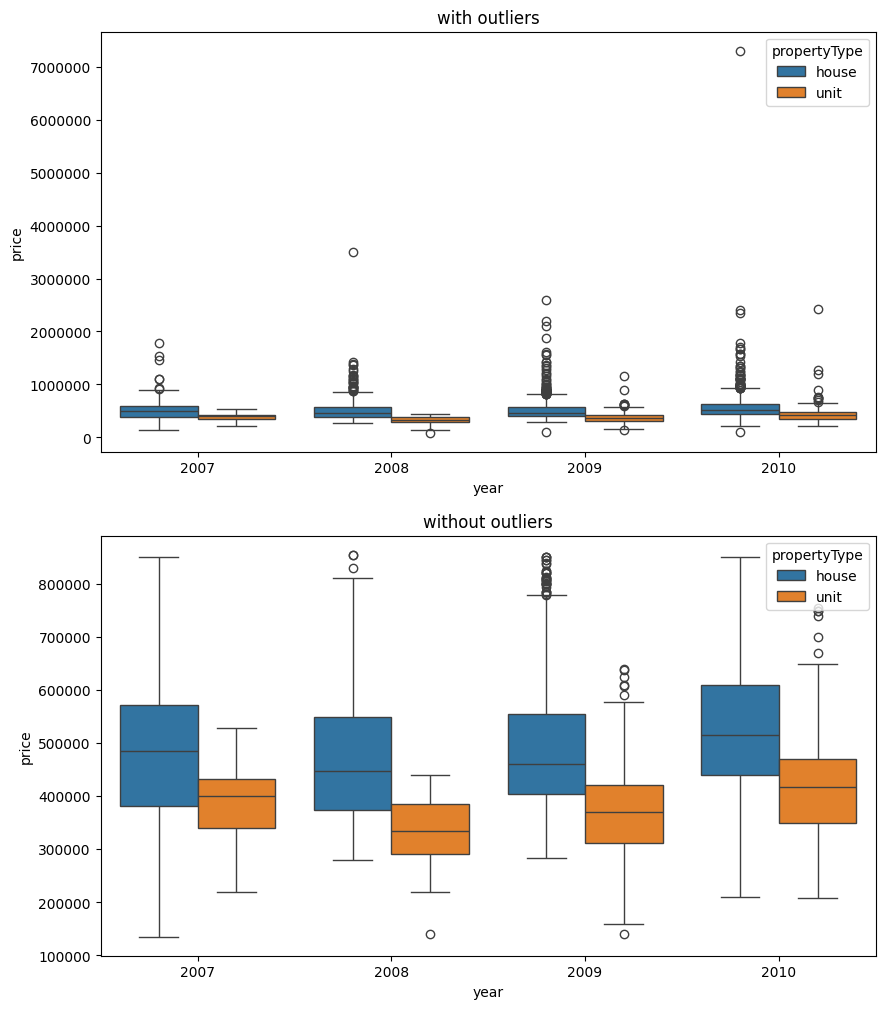

In [56]:
# 2007 ~ 2010 추출
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)

fig, ax = plt.subplots(nrows=2, figsize=(10, 12))
sns.boxplot(data=df, x='year', y='price', hue = 'propertyType', ax=ax[0])
ax[0].set_title("with outliers")
ax[0].yaxis.set_major_formatter(formatter)

sns.boxplot(data=df_clean, x='year', y='price', hue = 'propertyType', ax=ax[1])
ax[1].set_title("without outliers")